In [23]:
# importing all necessary libraries
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [24]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
df.columns = ['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print(df.head())

   Label  Alcohol  Malic Acid   Ash  Alcalinity of ash   Magnesium  \
0      1    14.23        1.71  2.43                15.6        127   
1      1    13.20        1.78  2.14                11.2        100   
2      1    13.16        2.36  2.67                18.6        101   
3      1    14.37        1.95  2.50                16.8        113   
4      1    13.24        2.59  2.87                21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  

In [25]:
# checking the data types of columns and whether they contain any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Label                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [26]:
# determining if standardization is needed.
# attributes are on different scales, standardization would help/
df.describe()

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:xlabel='Alcohol', ylabel='Label'>

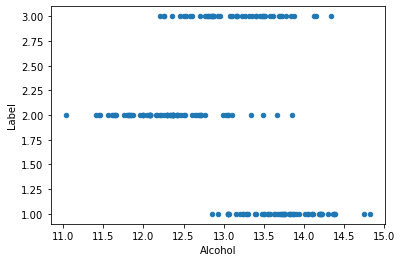

In [27]:
# experimenting with plotting data. Helps to give insight
df.plot.scatter(x = 'Alcohol', y = 'Label')

In [28]:
# checking if any column can be dropped.
# if abs(col) < 0.2, column will be dropped
# all columns have an absolute value of > 0.2, hence nothing is dropped
df.corr()

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Label,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [29]:
sc = StandardScaler()

In [30]:
X = df.drop("Label", axis = 1)
y = df['Label']

In [31]:
sc.fit(X)
X = sc.transform(X)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [33]:
ppn = Perceptron(max_iter = 1500, eta0 = 0.1, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 0.9722222222222222

Confusion matrix: 
[[14  0  0]
 [ 0 13  0]
 [ 0  1  8]]

Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      1.00      0.96        13
           3       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



In [34]:
ppn = LogisticRegression(C = 100, max_iter = 1500, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

# model fits perfectly. Overfit?

Accuracy score: 1.0

Confusion matrix: 
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]

Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [35]:
ppn = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 0.9166666666666666

Confusion matrix: 
[[13  1  0]
 [ 1 12  0]
 [ 0  1  8]]

Classification report: 
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.86      0.92      0.89        13
           3       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



In [37]:
ppn = SVC(C= 10000, kernel = 'rbf', degree = 3)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 0.9722222222222222

Confusion matrix: 
[[14  0  0]
 [ 0 13  0]
 [ 0  1  8]]

Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      1.00      0.96        13
           3       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



In [39]:
# seeing if dropping magnesium (low correlation score) helps

X = df.drop(['Label', 'Magnesium'], axis = 1)
y = df['Label']

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [41]:
ppn = SVC(C= 10000, kernel = 'rbf', degree = 3)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 0.9444444444444444

Confusion matrix: 
[[14  0  0]
 [ 1 12  0]
 [ 0  1  8]]

Classification report: 
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.92      0.92      0.92        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



In [ ]:
# doesn't help